
=== Statistical Analysis Results by Advertising Media ===
        TV radio newspaper sales                  
                            mean count   min   max
0      0.7  39.6       8.7   1.6     1   1.6   1.6
1      4.1  11.6       5.7   3.2     1   3.2   3.2
2      5.4  29.9       9.4   5.3     1   5.3   5.3
3      7.3  28.1      41.4   5.5     1   5.5   5.5
4      7.8  38.9      50.6   6.6     1   6.6   6.6
..     ...   ...       ...   ...   ...   ...   ...
195  289.7  42.3      51.2  25.4     1  25.4  25.4
196  290.7   4.1       8.5  12.8     1  12.8  12.8
197  292.9  28.3      43.2  21.4     1  21.4  21.4
198  293.6  27.7       1.8  20.7     1  20.7  20.7
199  296.4  36.3     100.9  23.8     1  23.8  23.8

[200 rows x 7 columns]


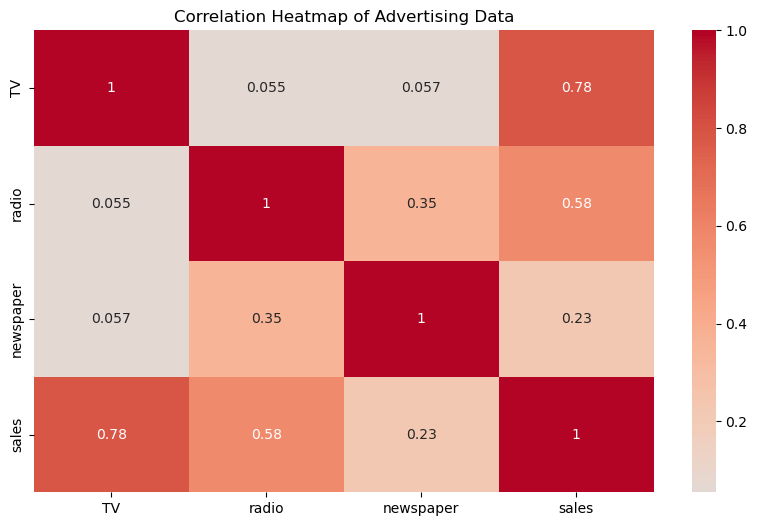

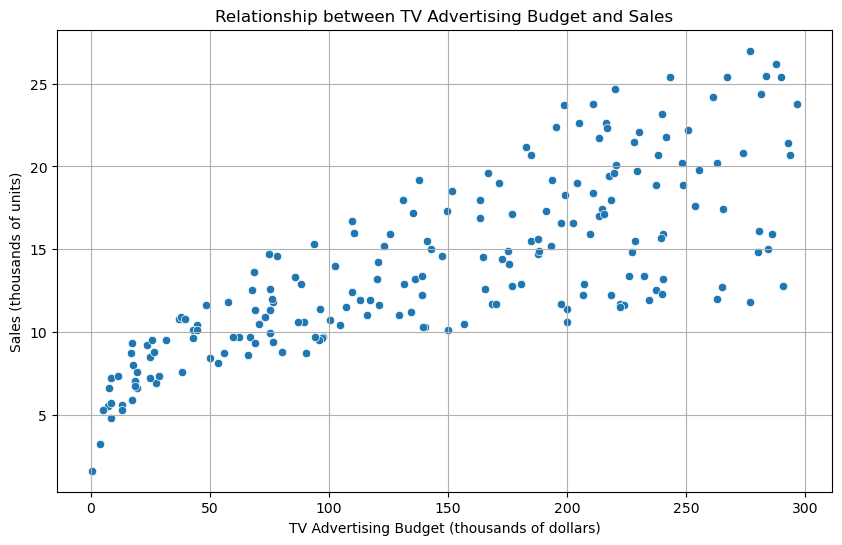

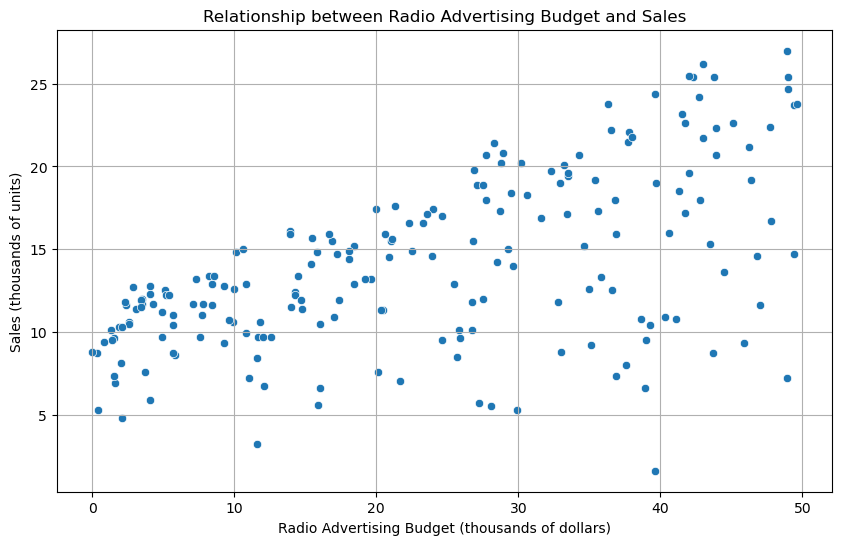

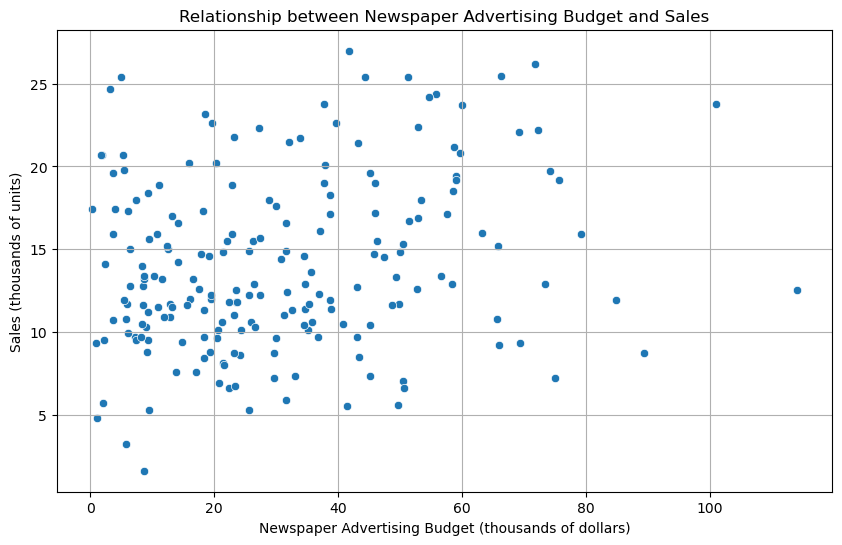

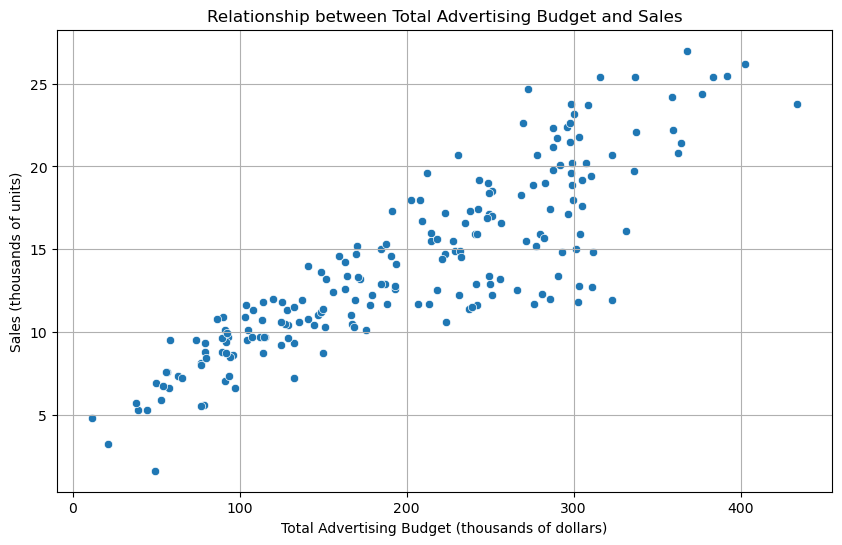


=== Model Evaluation Results ===
MSE (Mean Squared Error): 3.1741
R2 Score (Coefficient of Determination): 0.8994


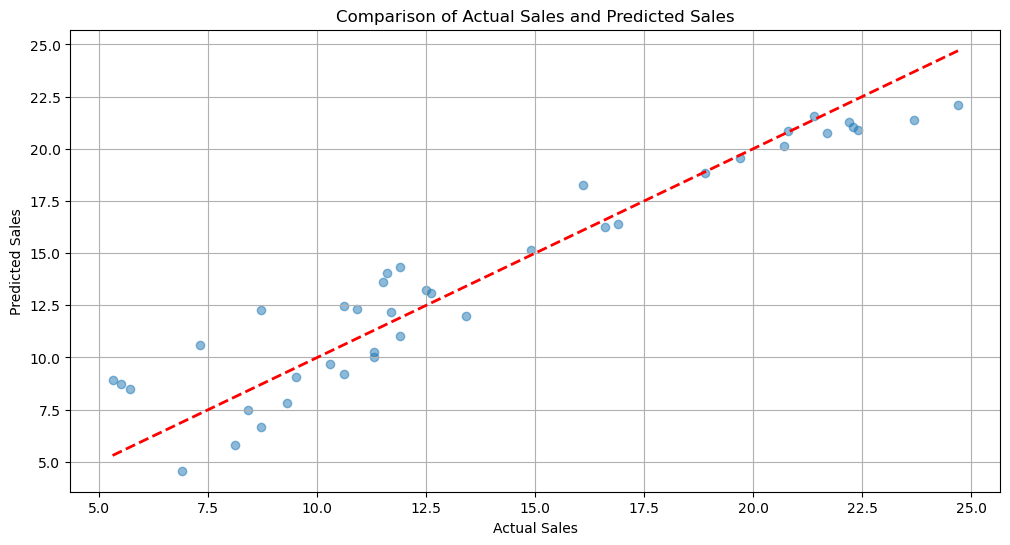

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load data
df = pd.read_csv('Advertising.csv')

# 2. Grouping
grouped_stats = df.groupby(['TV', 'radio', 'newspaper']).agg({
    'sales': ['mean', 'count', 'min', 'max']
}).reset_index()

print("\n=== Statistical Analysis Results by Advertising Media ===")
print(grouped_stats)

# 3. Graph
correlation_matrix = df[['TV', 'radio', 'newspaper', 'sales']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Advertising Data')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TV', y='sales')
plt.title('Relationship between TV Advertising Budget and Sales')
plt.xlabel('TV Advertising Budget (thousands of dollars)')
plt.ylabel('Sales (thousands of units)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='radio', y='sales')
plt.title('Relationship between Radio Advertising Budget and Sales')
plt.xlabel('Radio Advertising Budget (thousands of dollars)')
plt.ylabel('Sales (thousands of units)')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='newspaper', y='sales')
plt.title('Relationship between Newspaper Advertising Budget and Sales')
plt.xlabel('Newspaper Advertising Budget (thousands of dollars)')
plt.ylabel('Sales (thousands of units)')
plt.grid(True)
plt.show()

df['Total Advertising'] = df['TV'] + df['radio'] + df['newspaper']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Advertising', y='sales')
plt.title('Relationship between Total Advertising Budget and Sales')
plt.xlabel('Total Advertising Budget (thousands of dollars)')
plt.ylabel('Sales (thousands of units)')
plt.grid(True)
plt.show()

# 4. Machine Learning
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Model Evaluation Results ===")
print(f'MSE (Mean Squared Error): {mse:.4f}')
print(f'R2 Score (Coefficient of Determination): {r2:.4f}')

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Comparison of Actual Sales and Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()